In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
 import datetime as dt

In [4]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
 engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)






('2017-08-23',)


In [11]:
# Calculate the date 1 year ago from the last data point in the database

one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_data_df = pd.DataFrame(prcp_data)
prcp_data_df.set_index('date').head(20)


# Sort the dataframe by date

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


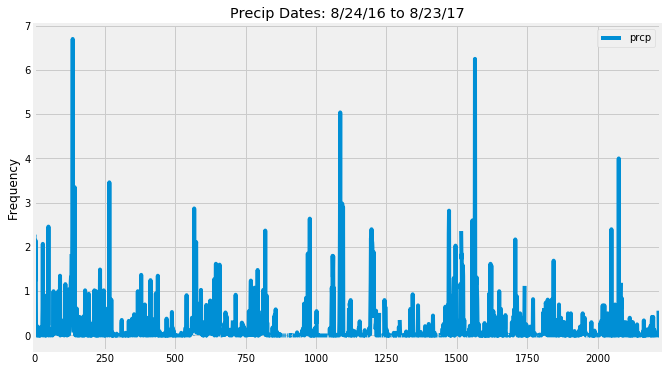

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = prcp_data_df.plot(figsize=(10,6))
ax.set_title("Precip Dates: 8/24/16 to 8/23/17")
ax.set_ylabel('Frequency')
plt.show()

In [15]:
#Use Pandas to print the summary statistics for the precipitation data.
prcp_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
#Design a query to calculate the total number of stations.

locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} total stations.".format(locations))

There are 9 total stations.


In [17]:
# Design a query to find the most active stations. List the stations and observation counts in descending order.

active = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

active



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
#Which station has the highest number of observations

best_station = active[0][0]

best_station



'USC00519281'

In [19]:
#Which station has the highest number of observations
#Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.


#Included this because it was in the r

temp = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
session.query(*temp).filter(Measurement.station==best_station).all()     

[(54.0, 85.0, 71.66378066378067)]

In [20]:
temp_obs = session.query(Measurement.tobs).\
                                filter(Measurement.station==best_station).\
                                filter(Measurement.date >= one_year_ago).\
                                order_by(Measurement.date.desc()).all()
temp_obs_df = pd.DataFrame(temp_obs)
temp_obs_df.head(10)

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
5,77.0
6,83.0
7,82.0
8,77.0
9,76.0


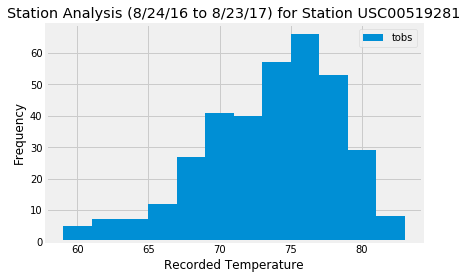

In [21]:
plt.hist(temp_obs_df['tobs'], bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + best_station)
plt.legend(["tobs"])
plt.show()